In [1]:
import pandas
import seaborn as sns
import matplotlib as mat

# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

covid_2020_data = pandas.read_csv("covid19_countrywise_Data.csv")

covid_2020_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,07/09/2020,7,9,2020,74,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847
1,06/09/2020,6,9,2020,20,0,Afghanistan,AF,AFG,38041757.0,Asia,0.854324
2,05/09/2020,5,9,2020,16,0,Afghanistan,AF,AFG,38041757.0,Asia,1.077763
3,04/09/2020,4,9,2020,45,1,Afghanistan,AF,AFG,38041757.0,Asia,1.135594
4,03/09/2020,3,9,2020,38,3,Afghanistan,AF,AFG,38041757.0,Asia,1.272286
...,...,...,...,...,...,...,...,...,...,...,...,...
41205,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
41206,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
41207,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
41208,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [2]:
#Question #1: How has the populations of a country affected the amount of Covid-19?

#organizing the data to start from a descending and ascending order based on the population number
listInDescendingOrderPopulation = covid_2020_data.sort_values('popData2019', ascending=False)
listInAscendingOrderPopulation = covid_2020_data.sort_values('popData2019')

#getting the first row for each list, so I can have access to the top and bottom population country
topPopulation = listInDescendingOrderPopulation.head(1)
bottomPopulation = listInAscendingOrderPopulation.head(1)

#Breaking the data lists and only holding the case numbers and country name    
casesAndCountryDataAscend = listInAscendingOrderPopulation.loc[:,["cases","countriesAndTerritories"]]
casesAndCountryDataDescend = listInDescendingOrderPopulation.loc[:,["cases","countriesAndTerritories"]]

#searching through the lists and getting the total cases in the top and bottom population country
index = 0
bottomPopulationCasesTotal = 0
topPopulationCasesTotal = 0
while((casesAndCountryDataAscend['countriesAndTerritories'].iloc[index] == bottomPopulation['countriesAndTerritories']).bool()):
    bottomPopulationCasesTotal += casesAndCountryDataAscend['cases'].iloc[index]
    index += 1

index = 0
while((casesAndCountryDataDescend['countriesAndTerritories'].iloc[index] == topPopulation['countriesAndTerritories']).bool()):
    topPopulationCasesTotal += casesAndCountryDataDescend['cases'].iloc[index]
    index += 1

#finding the percentage of covid cases out of the country's population
percentageOfPeopleHaveCovidTopPop = topPopulationCasesTotal / topPopulation['popData2019']
percentageOfPeopleHaveCovidBottomPop = bottomPopulationCasesTotal / bottomPopulation['popData2019']

print(topPopulationCasesTotal, "/", topPopulation['popData2019'])
print(percentageOfPeopleHaveCovidBottomPop)
print(percentageOfPeopleHaveCovidTopPop)
#print(casesAndCountryDataAscend['countriesAndTerritories'].iloc[index] == bottomPopulation['countriesAndTerritories'])

#print(listInAscendingOrderPopulation.iloc[2])
#print(listInAscendingOrderPopulation['countriesAndTerritories'])





90058 / 8331    1.433784e+09
Name: popData2019, dtype: float64
17191    0.014724
Name: popData2019, dtype: float64
8331    0.000063
Name: popData2019, dtype: float64


In [3]:
#Question #2: Does population affect the probability of dying from Covid-19?

#Find the probability of dying in the most populated country, and the less populated country
#P(having covid & dying)
#P(Having covid) * P(dying)

#Finding the probability of having covid in the country with the highest population
deathAndCountryDataDescend = listInDescendingOrderPopulation.loc[:,["deaths","countriesAndTerritories"]]
index = 0
topPopulationDeathTotal = 0
while((deathAndCountryDataDescend['countriesAndTerritories'].iloc[index] == topPopulation['countriesAndTerritories']).bool()):
    topPopulationDeathTotal += deathAndCountryDataDescend['deaths'].iloc[index]
    index += 1

topProbabilityOfCovidAndDeath = percentageOfPeopleHaveCovidTopPop * (topPopulationDeathTotal / topPopulation['popData2019'])

print(topProbabilityOfCovidAndDeath)

#Finding the probability of having covid in the country with the lowest population
deathAndCountryDataAscend = listInAscendingOrderPopulation.loc[:,["deaths","countriesAndTerritories"]]
index = 0
bottomPopulationDeathTotal = 0
while((deathAndCountryDataAscend['countriesAndTerritories'].iloc[index] == bottomPopulation['countriesAndTerritories']).bool()):
    bottomPopulationDeathTotal += deathAndCountryDataAscend['deaths'].iloc[index]
    index += 1
    
bottomProbabilityOfCovidAndDeath = percentageOfPeopleHaveCovidBottomPop * (bottomPopulationDeathTotal / bottomPopulation['popData2019'])

print(bottomProbabilityOfCovidAndDeath)



8331    2.072126e-10
Name: popData2019, dtype: float64
17191    0.0
Name: popData2019, dtype: float64


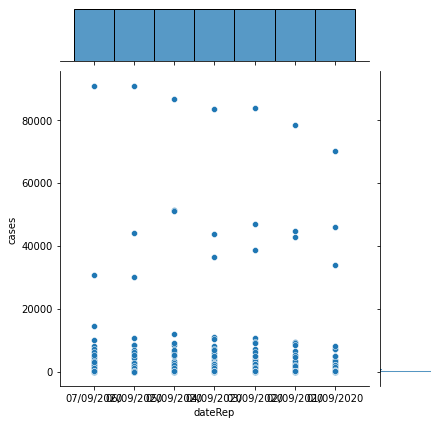

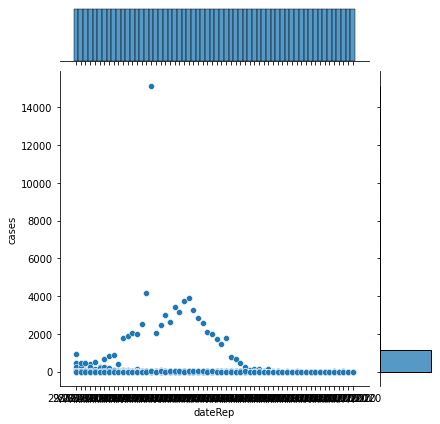

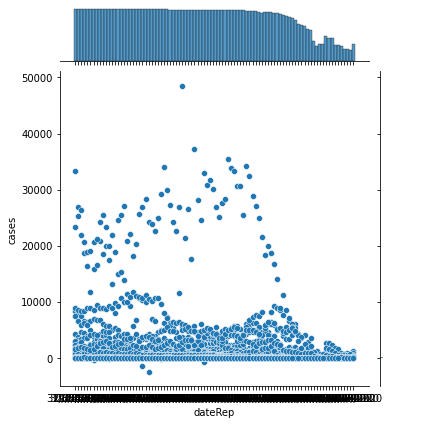

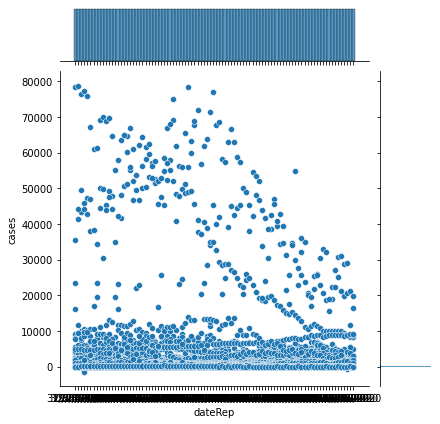

In [129]:
#Question #3: Does the year of the season affect the amount of Covid-19 cases?
#Come back to this question...
#Need to filter each season (fall, winter, spring, summer) and create a graph for each season and compare.
#graph the amount of covid cases and the dates on a bar graph to analyze them.
datesAndCasesData = covid_2020_data.loc[:,["dateRep","cases","month"]]
filter_fallDates = datesAndCasesData[datesAndCasesData['month'] == 9]
filter_winterDates = datesAndCasesData[datesAndCasesData['month'] <= 2]
filter_springDates = datesAndCasesData[(datesAndCasesData['month'] >= 3) & (datesAndCasesData['month'] <= 5)]
filter_summerDates = datesAndCasesData[(datesAndCasesData['month'] >= 6) & (datesAndCasesData['month'] < 9)]

sns.jointplot(x = filter_fallDates['dateRep'], y = filter_fallDates['cases'], kind = 'scatter')
sns.jointplot(x = filter_winterDates['dateRep'], y = filter_winterDates['cases'], kind = 'scatter')
sns.jointplot(x = filter_springDates['dateRep'], y = filter_springDates['cases'], kind = 'scatter')
sns.jointplot(x = filter_summerDates['dateRep'], y = filter_summerDates['cases'], kind = 'scatter')


In [130]:
#Question #4: What is the probability of catching Covid-19 virus in a specific country?

#Country = United States
filter_USA = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'United_States_of_America']
numberOfCasesInUS = 0
populationOfUS = filter_USA['popData2019'].head(1)
for cases in filter_USA['cases']:
    numberOfCasesInUS += cases

probabilityOfCatchingCovidInUS = numberOfCasesInUS / populationOfUS 
print(numberOfCasesInUS, "/", populationOfUS, " = ")
probabilityOfCatchingCovidInUS 

6276421 / 39384    329064917.0
Name: popData2019, dtype: float64  = 


39384    0.019074
Name: popData2019, dtype: float64

In [131]:
#Question 5: Does the amount of resources a specific country have affect the amount of death occuring?




In [236]:
#Question #6: Does the amount of death affect which country recieves the vaccine first?

#China received approval for the vaccination in Dec 30, 2020
#United States received approval for the vaccination in August 31, 2021
#United Kingdom recived approval for the vaccination in Dec 2, 2020
#Afghanistan recived approval for the vaccination on March, 2021

#Already created filter USA data in question 4
filter_China_US_UK_Afghanistan = covid_2020_data[(covid_2020_data ['countriesAndTerritories'] == 'China') | (covid_2020_data['countriesAndTerritories'] == 'United_States_of_America') | (covid_2020_data['countriesAndTerritories'] == 'Afghanistan') | (covid_2020_data['countriesAndTerritories'] == 'United_Kingdom')]
filter_China = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'China']
#filter_UK = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'United_Kingdom']
#filter_Afghanistan = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'United_States_of_America']

numberOfChinaDeath = 0
numberOfUSDeath = 0
numberOfUKDeath = 0
numberOfAfghanistanDeath = 0

index = 0
for country in filter_China_US_UK_Afghanistan['countriesAndTerritories']:
    if(country == 'China'):
        numberOfChinaDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    elif(country == 'United_States_of_America'):
        numberOfUSDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    elif(country == 'United_Kingdom'):
        numberOfUKDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    else:
        numberOfAfghanistanDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    index += 1
    
print(numberOfAfghanistanDeath)
print(numberOfUSDeath)
print(numberOfUKDeath)
print(numberOfChinaDeath)

print("Death Rate has no connection to the timing of the vaccination. It's dependent on the government, resources, and the scientists.")




1412
188941
41551
4730
Death Rate has no connection to the timing of the vaccination. It's dependent on the government, resources, and the scientists


<AxesSubplot:xlabel='dateRep', ylabel='cases'>

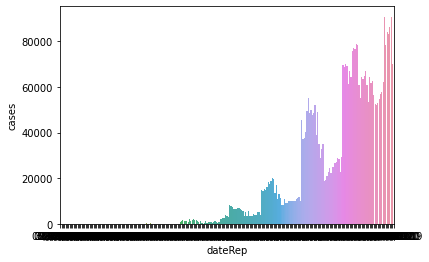

In [274]:
#Question 7: How does the vaccine affect the coronavirus and its deaths?
#Country = India

#Create a graph for India's cases and deaths (2 graphs - barplot)
filter_India = covid_2020_data[covid_2020_data['countriesAndTerritories'] == 'India'].sort_values('month', ascending=True)

sns.barplot(x = filter_India['dateRep'], y = filter_India['cases'])


<AxesSubplot:xlabel='dateRep', ylabel='deaths'>

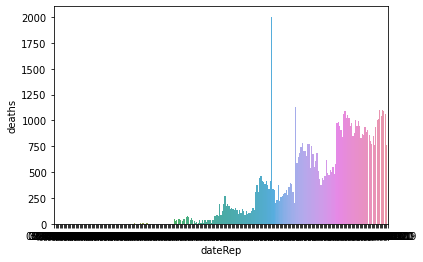

In [275]:
#Question 7 Continued.
#Barplot for India death as it didn't let me print two in one cell

sns.barplot(x = filter_India['dateRep'], y = filter_India['deaths'])

In [276]:
#Question 8: What is the probability of catching covid and dying?
# P(Covid & Dying)
# = P(Covid) * P(Dying)

numberOfCovidCases = 0
numberOfDeath = 0
totalPopulationOfWorld = 7900000000000
for cases in covid_2020_data['cases']:
    numberOfCovidCases += cases

for death in covid_2020_data['deaths']:
    numberOfDeath += death

probabilityOfCovid_Death = (numberOfCovidCases / totalPopulationOfWorld) * (numberOfDeath / numberOfCovidCases)
probabilityOfCovid_Death



1.1256405063291138e-07

In [277]:
#Question 9: Does a specific temperature affect catching covid?
#Hottest country in the world = "Lybia"
#Coldest country in the world = "Kazakhstan" passing after Antarctica 
filter_hottestCountry = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'Libya']
filter_coldestCountry = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'Kazakhstan']

numberOfCasesInLibya = 0
numberOfCasesInKazakhstan = 0
libyaPopulation = filter_hottestCountry['popData2019'].head(1)
kazakhstanPopulation = filter_coldestCountry['popData2019'].head(1)
for cases in filter_hottestCountry['cases']:
    numberOfCasesInLibya += cases

for numberOfCases in filter_coldestCountry['cases']:
    numberOfCasesInKazakhstan += numberOfCases

probabilityOfCatchCovidInLibya = numberOfCasesInLibya / libyaPopulation
probabilityOfCatchCovidInKazakhstan = numberOfCasesInKazakhstan / kazakhstanPopulation

print(probabilityOfCatchCovidInLibya)
print(probabilityOfCatchCovidInKazakhstan)





22375    0.002619
Name: popData2019, dtype: float64
20529    0.00723
Name: popData2019, dtype: float64


In [278]:
#Question 10: What has helped people survived covid?
#Events were quarantine and recieving the vaccine
#Create graphs throughout the events and compare to see if there were a difference in the number of cases
#This will allow us to identify which solution was helpful and which wasn't, or if there were outliers in the events. 